# Assignment 
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement
Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
Company required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Interpretation of Data
1) Reading/understanding/Visualising the data
2) Preparing the data for modelling
3) Training the model
4) Residual analysis
5) Prediction and Evaluation on the test data


In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



# Step 1 - Reading and Understanding the Data

In [588]:
df =  pd.read_csv("day.csv")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [589]:
df.shape

(730, 16)

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [591]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [592]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [593]:
df.size

11680

In [594]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [595]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06/01/18,1,0,1,0,6,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07/01/18,1,0,1,0,0,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08/01/18,1,0,1,0,1,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09/01/18,1,0,1,0,2,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/01/18,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Dropping columns

* Record Index
* dteday
* Casual and Registered


In [596]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [597]:
df.shape

(730, 12)

# Business Problem Statement 
Company required to model the demand for shared bikes with the available independent variables.

### Attributes Information
	- instant: record index  ---> Dropped
	- dteday : date ---> Dropped
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users ---> Dropped
	- registered: count of registered users ---> Dropped
	- cnt: count of total rental bikes including both casual and registered



In [598]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [599]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [600]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [601]:
num_col = ["cnt", "temp", "atemp", "hum", "windspeed"]
cat_col = ["yr", "holiday", "workingday", "weathersit","season", "mnth", "weekday"]

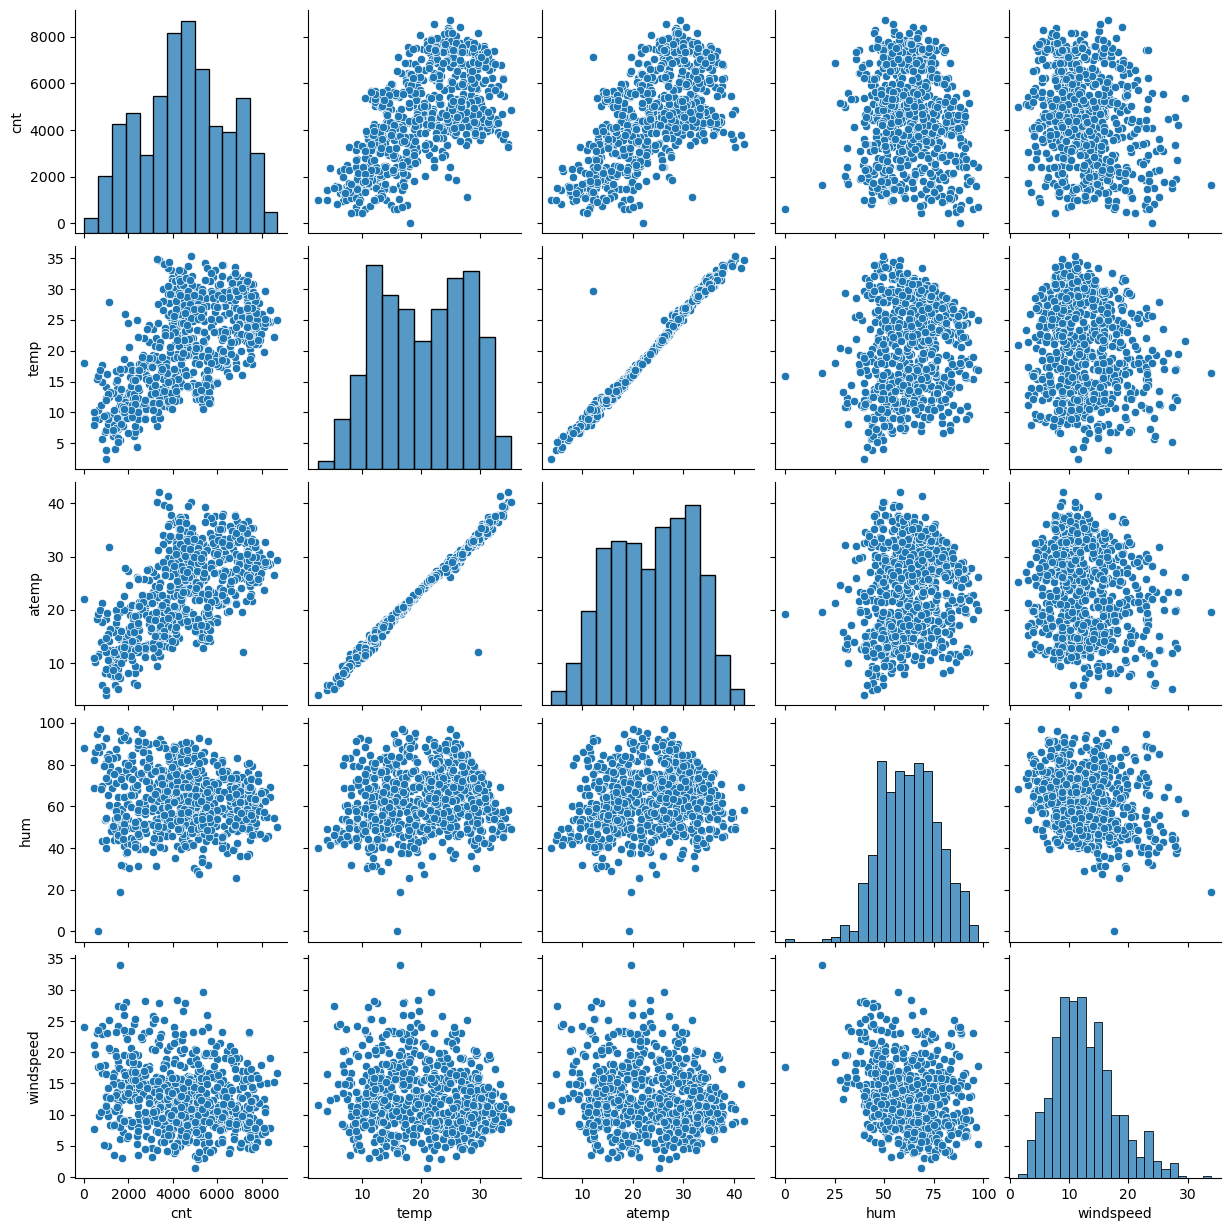

(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


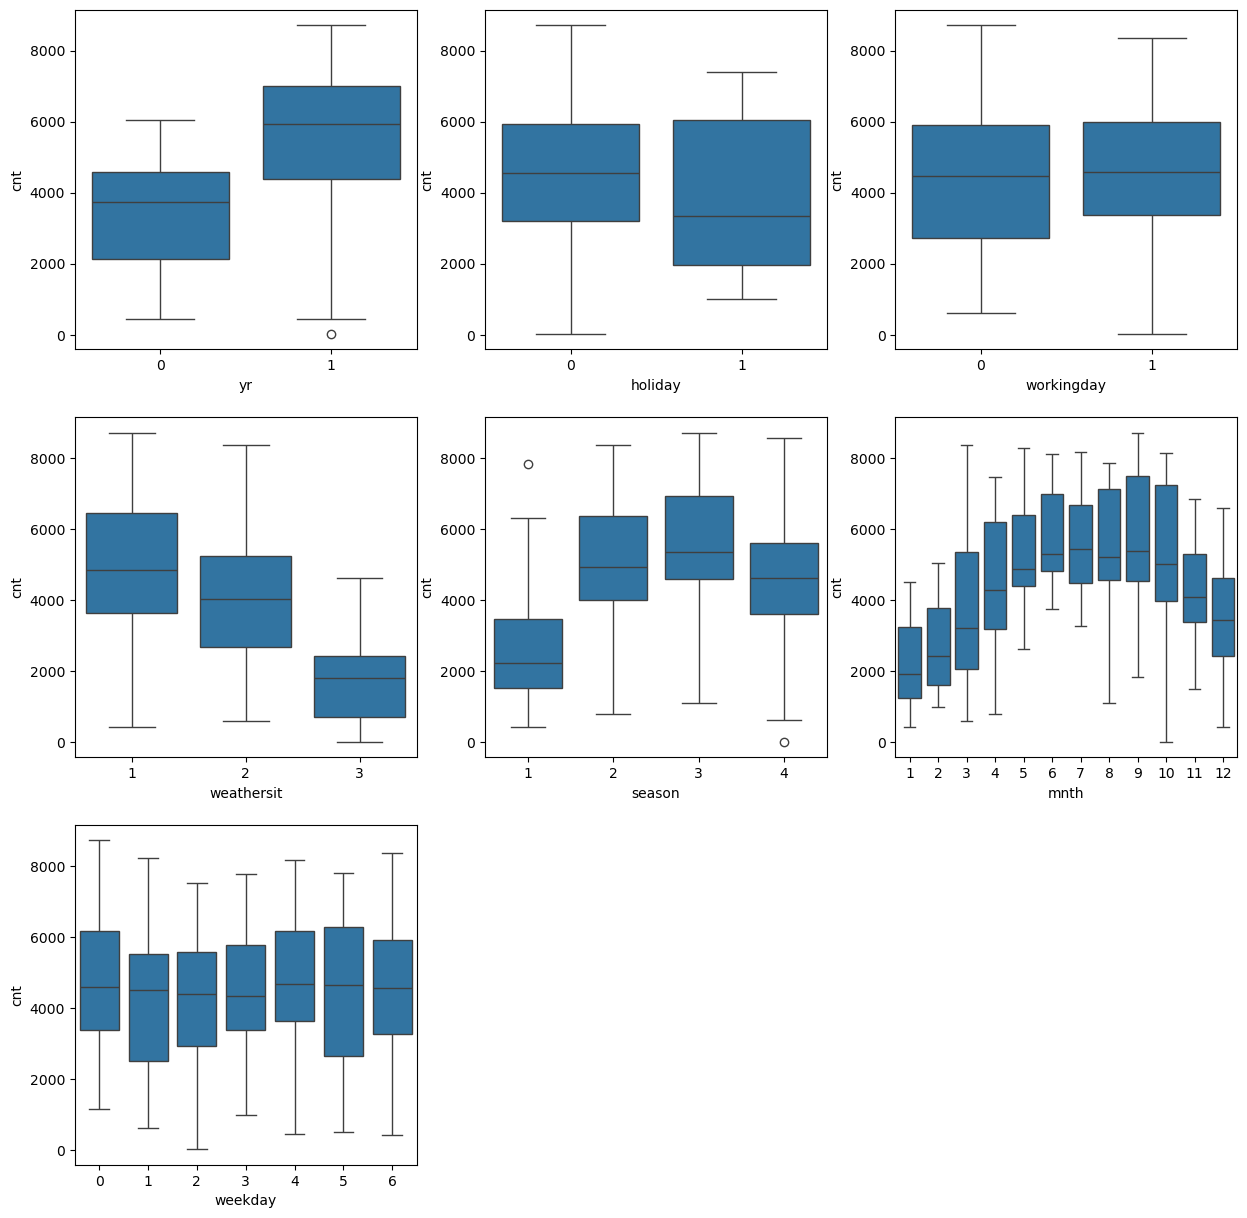

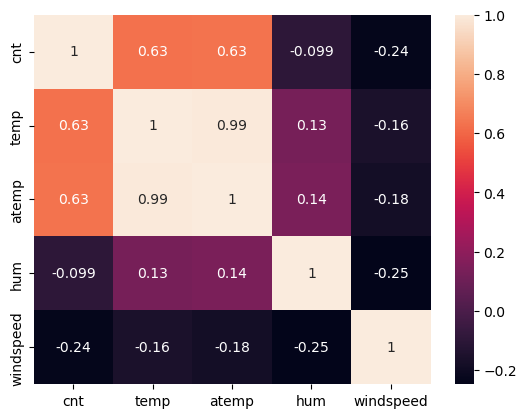

In [602]:
# Univariate Analysis
sns.pairplot(df[num_col])  # numerical - histplot  #categorical - countplot
plt.show()

# Bivariate Analysis     #numerical vs numerical - scatter plot  #categorical vs numerical - boxplot 
# plt.figure(figsize=(12,20))  
# plt.subplot(2,3,1)
# sns.boxplot(x="yr", y="cnt", data = df)

# plt.subplot(2,3,2)
# sns.boxplot(x="holiday", y="cnt", data = df)

# plt.subplot(2,3,3)
# sns.boxplot(x="workingday", y="cnt", data = df)

# plt.subplot(2,3,4)
# sns.boxplot(x="weathersit", y="cnt", data = df)

# plt.subplot(2,3,5)
# sns.boxplot(x="season", y="cnt", data = df)

# plt.subplot(2,3,6)
# sns.boxplot(x="mnth", y="cnt", data = df) 
# plt.show()

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Multivariate Analysis
sns.heatmap(df[num_col].corr(), annot=True )
plt.show()

### When Correlation between two features is 1 and -1  it indicates high similarity and and dropping one of the highly correlated features is advisable for several reasons:

* Redundancy: Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.
* Simplicity and Interpretability: A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model’s behavior.
* Computational Efficiency: Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.
* Avoiding Overfitting: Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

#### Inferences:-
*  Temp and atemp are highly corelated hence we can take action to remove one of them as it can create Multicolinearity
* Temp and atemp also has high corelation with cnt variable

In [603]:
# drop column atemp
df.drop(["atemp"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Analysis of Categorical Variable with Target Variable

In [604]:
varlist = ['season', 'weekday', 'weathersit', 'mnth']

#df.season = df.season.apply(lambda x: x.map({ "1":"spring", "2":"summer", "3":"fall", "4":"winter"}))
df['season'] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weathersit'] = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Rainy"})

# season_dum =  pd.get_dummies(df['season'], dtype=int, drop_first=True)  
# weekday_dum =  pd.get_dummies(df['weekday'], dtype=int, drop_first=True)  
# mnth_dum =  pd.get_dummies(df['mnth'], dtype=int, drop_first=True)  
# weathersit_dum =  pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)  

In [605]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Friday,1,Mist,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Saturday,1,Mist,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Sunday,0,Mist,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796


(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


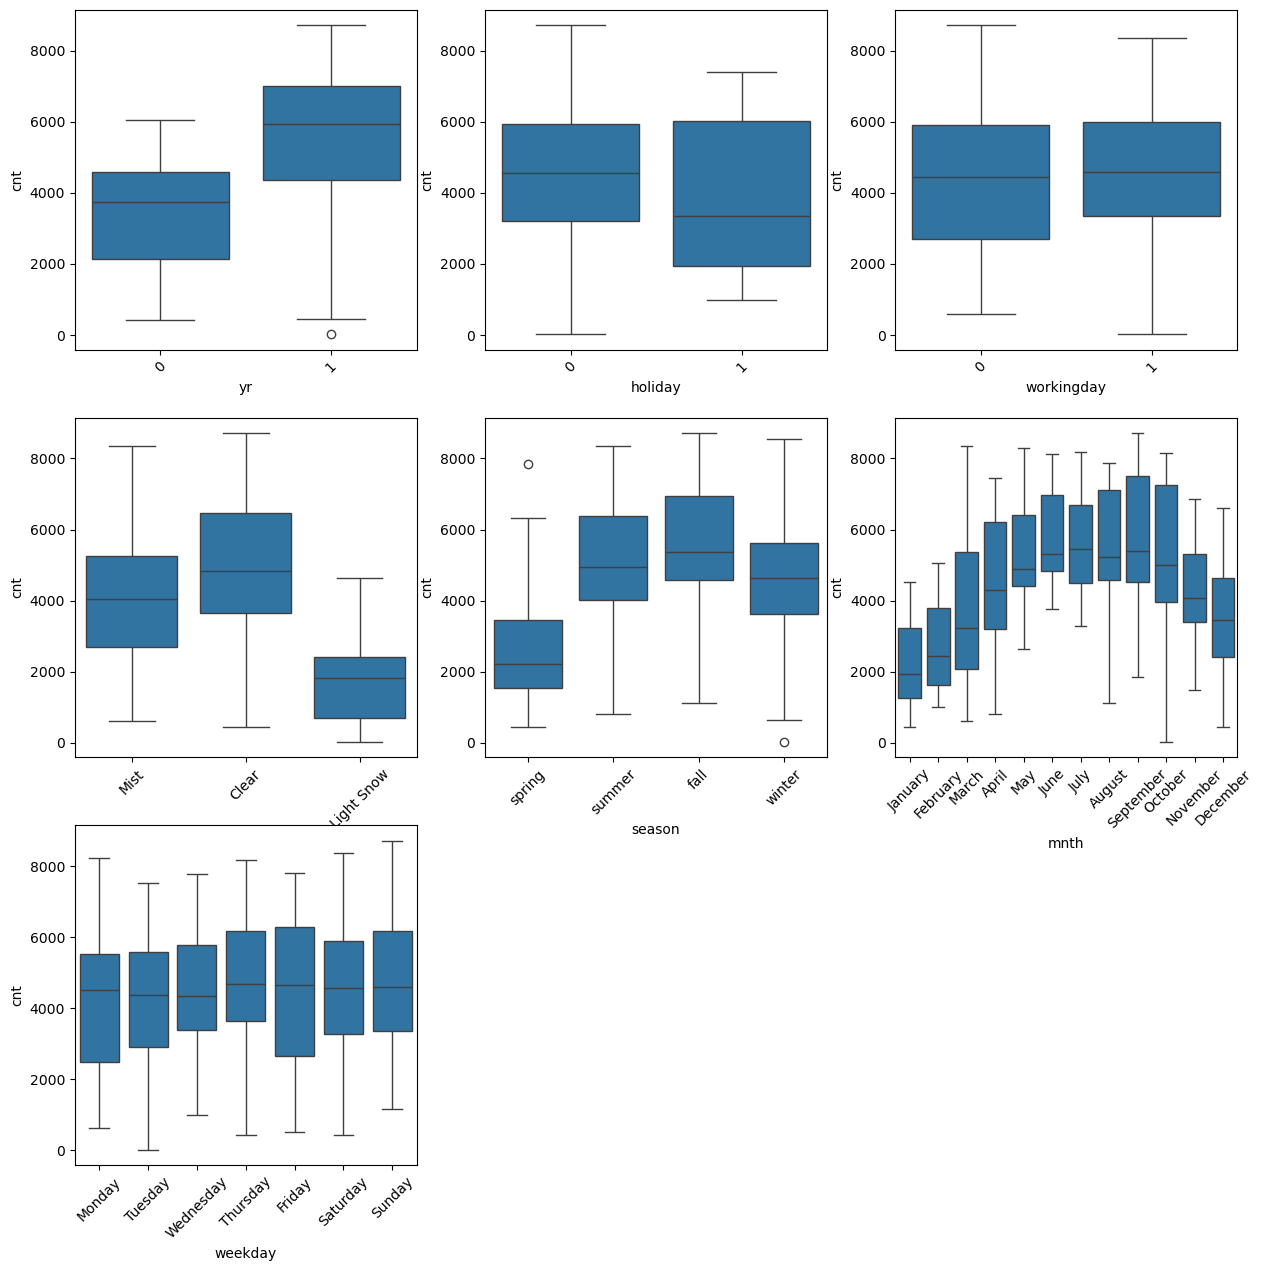

In [606]:
# Box Plot to see categorical columns to see the deman for Bike Analysis

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    a = sns.boxplot(data=df, x=i[1], y='cnt')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

Inferences: -
* Season 3 fall has the highest demand
* demand grown immediate next year
* demand continously growing each month till September
* demand in holiday is increased
* demand in clear climate is more
* Demand on Saturday is increased

#### Verifying with Regression plot that corealation obtained above for variables w.r.t cnt is correct

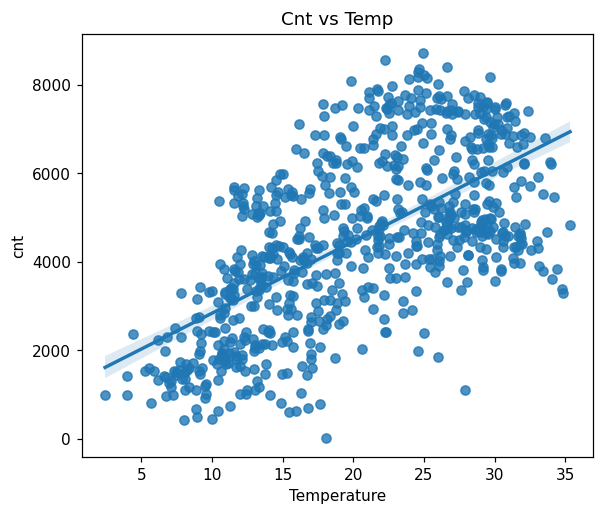

In [607]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt", x= "temp")
plt.xlabel("Temperature")
plt.show()

Inferences :-
Demands for bikes is highy corelated to Temp
We can see count is linearly increasing as temperature increases

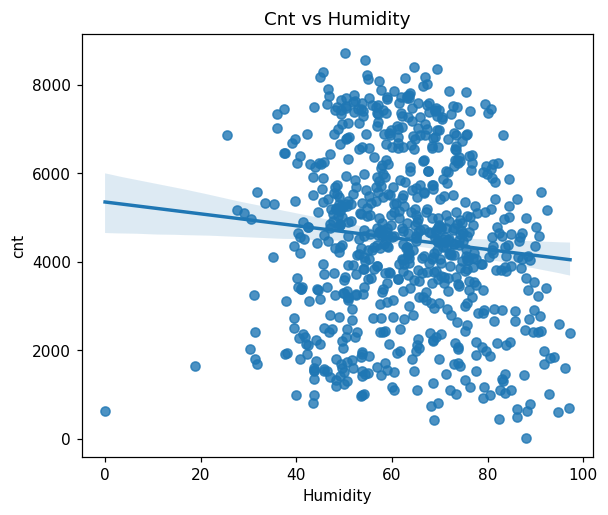

In [608]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Humidity")
sns.regplot(data=df,y="cnt", x= "hum")
plt.xlabel("Humidity")
plt.show()

Inferences:-
Demands is decreasing as the humidity is increasing
Demand for bike is negativley corelated with Humidity

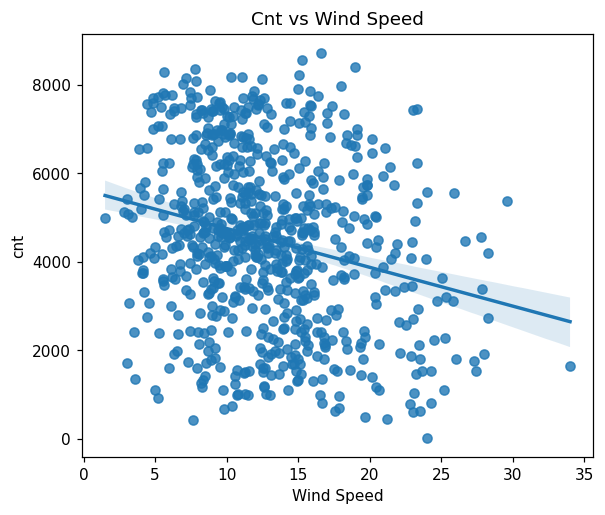

In [609]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Wind Speed")
sns.regplot(data=df,y="cnt", x= "windspeed")
plt.xlabel("Wind Speed")
plt.show()

Inferences:-
Demands is decreasing as the windspeed is increasing
Demand for bike is negativley corelated with Windspeed

# Step 2 - Preparing the Data for Modelling
Encoding:-
 - Converting binary 1/0
 - Converting to dummy variables

### Create dummy variables for all Categorical Variables

In [610]:
df_bikessharing =  pd.get_dummies(data=df,columns=varlist,drop_first= True, dtype=int)

In [611]:
df_bikessharing.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [612]:
df_bikessharing.shape

(730, 29)

In [613]:
df_bikessharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

# Step 3 - Model Building 
### Train-Test Split

In [614]:
y = df_bikessharing.pop("cnt")
X = df_bikessharing

In [615]:
X.shape

(730, 28)

In [616]:
y.shape

(730,)

### Mixed Approach - Automated Approach and Step Wise Reducing Feature using VIF and P stats

In [617]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

In [618]:
y_train.shape

(510,)

In [619]:
X_train.shape

(510, 28)

In [620]:
X_test.shape

(220, 28)

In [621]:
y_test.shape

(220,)

In [622]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [623]:
X_train.columns = X_train.columns.astype('str')
X_test.columns =  X_test.columns.astype('str')

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [624]:
X_train.dtype

dtype('float64')

In [625]:
X_train

array([[ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       ...,
       [-1.01581126, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [-1.01581126, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881]])

In [626]:
X_train_df = pd.DataFrame(X_train,columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [627]:
X_train_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0.984435,-0.161731,0.691564,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,-1.445998,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,-0.287754,3.03315,-0.303442,-0.307279,-0.303442,-0.295669


In [628]:
X_test_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,-1.015811,6.183104,-1.445998,1.304506,0.047244,-1.395126,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,0.691564,1.612837,-0.276917,-0.985373,-0.566783,1.745743,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,3.475187,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669


### Feature Selection - There are two methods Standaridization and MinMax, here we have used Standaridization

In [629]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [630]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20)

In [631]:
selector = selector.fit(X_train, y_train)
print(selector.support_)

[ True  True False  True  True  True  True  True  True  True False False
 False  True False  True  True  True  True  True  True  True False False
  True  True False  True]


In [632]:
selected_features = X_train_df.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Tuesday',
       'weathersit_Light Snow', 'weathersit_Mist', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_May', 'mnth_November', 'mnth_September'],
      dtype='object')

In [633]:
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]
X_train.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Light Snow,weathersit_Mist,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September
0,0.984435,-0.161731,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.428129,-0.424918,-0.174078,-0.725911,-0.326023,-0.303442,-0.267261,-0.311086,3.475187,-0.303442,-0.307279,-0.295669
1,0.984435,-0.161731,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.428129,-0.424918,-0.174078,1.377580,-0.326023,-0.303442,-0.267261,-0.311086,-0.287754,-0.303442,-0.307279,-0.295669


### Modelling

In [634]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [635]:
X_train_sm.shape

(510, 21)

In [636]:
X_test_sm.shape

(220, 21)

In [637]:
y_train.shape

(510,)

In [638]:
X_train_sm.dtypes

const                    float64
yr                       float64
holiday                  float64
temp                     float64
hum                      float64
windspeed                float64
season_spring            float64
season_summer            float64
season_winter            float64
weekday_Monday           float64
weekday_Tuesday          float64
weathersit_Light Snow    float64
weathersit_Mist          float64
mnth_August              float64
mnth_December            float64
mnth_February            float64
mnth_January             float64
mnth_July                float64
mnth_May                 float64
mnth_November            float64
mnth_September           float64
dtype: object

In [639]:
y_train.dtypes

dtype('int64')

### Model 1

In [640]:
model1 = sm.OLS(np.array(y_train), X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.18e-186
Time:                        21:12:02   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     489   BIC:                             8339.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.196    131.165      0.000    4418.148    4552.527
yr                     1004.6783     34.917     28.773      0.000     936.072    1073.284
holiday                -122.9016     34.918     -3.520      0.000    -191.509     -54.295
temp                    883.9289     75.789     11.663      0.000     735.018    1032.840
hum                    -202.2901     48.028     -4.212      0.000    -296.657    -107.923
windspeed              -269.0788     37.843     -7.110      0.000    -343.433    -194.724
season_spring          -159.2820     99.837     -1.595      0.111    -355.444      36.880
season_summer           162.8739     87.757      1.856      0.064      -9.553     335.301
season_winter           418.4045     85.505      4.893      0.000     250.402     586.407
weekday_Monday          -82.0686     35.079     -2.340      0.020    -150.993     -13.144
weekday_Tuesday         -85.3839     35.174     -2.427      0.016    -154.495     -16.273
weathersit_Light Snow  -367.3095     38.675     -9.497      0.000    -443.299    -291.320
weathersit_Mist        -235.1856     42.927     -5.479      0.000    -319.529    -150.842
mnth_August              48.4658     60.853      0.796      0.426     -71.100     168.031
mnth_December          -111.8116     44.180     -2.531      0.012    -198.618     -25.006
mnth_February           -81.7478     46.733     -1.749      0.081    -173.570      10.074
mnth_January           -159.2155     52.718     -3.020      0.003    -262.797     -55.634
mnth_July               -83.6789     57.244     -1.462      0.144    -196.153      28.796
mnth_May                 49.5046     42.071      1.177      0.240     -33.158     132.167
mnth_November          -109.6531     46.297     -2.368      0.018    -200.619     -18.687
mnth_September          200.2344     50.941      3.931      0.000     100.144     300.324
==============================================================================
Omnibus:                       73.579   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.004
Skew:                          -0.721   Prob(JB):                     1.23e-42
Kurtosis:                       5.646   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences -
R Squared and Adjusted R Square are good and similar
However P-Stats for mnth_August > 0.05 hence need to drop

In [641]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.042598
2,holiday,1.042629
3,temp,4.911899
4,hum,1.972568
5,windspeed,1.224642
6,season_spring,8.523576
7,season_summer,6.585743
8,season_winter,6.252077
9,weekday_Monday,1.052313


In [642]:
X_train_sm = X_train_sm.drop("season_spring", axis=1)
X_test_sm = X_test_sm.drop("season_spring", axis=1)

### Model 2

In [643]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.32e-187
Time:                        21:12:02   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     490   BIC:                             8336.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.250    130.958      0.000    4418.042    4552.633
yr                     1001.2128     34.904     28.685      0.000     932.632    1069.793
holiday                -123.6329     34.970     -3.535      0.000    -192.342     -54.924
temp                    936.7022     68.297     13.715      0.000     802.512    1070.892
hum                    -209.0413     47.917     -4.363      0.000    -303.189    -114.894
windspeed              -274.8159     37.731     -7.284      0.000    -348.950    -200.682
season_summer           268.9476     57.369      4.688      0.000     156.228     381.667
season_winter           522.2389     55.543      9.402      0.000     413.106     631.371
weekday_Monday          -82.5371     35.133     -2.349      0.019    -151.568     -13.506
weekday_Tuesday         -85.5232     35.229     -2.428      0.016    -154.742     -16.304
weathersit_Light Snow  -362.4987     38.618     -9.387      0.000    -438.376    -286.621
weathersit_Mist        -231.9626     42.947     -5.401      0.000    -316.345    -147.580
mnth_August             103.4615     50.227      2.060      0.040       4.774     202.149
mnth_December          -107.3710     44.162     -2.431      0.015    -194.141     -20.601
mnth_February           -97.7664     45.714     -2.139      0.033    -187.585      -7.948
mnth_January           -172.7628     52.111     -3.315      0.001    -275.152     -70.373
mnth_July               -38.0427     49.663     -0.766      0.444    -135.622      59.536
mnth_May                 43.4487     41.966      1.035      0.301     -39.006     125.904
mnth_November           -97.8941     45.779     -2.138      0.033    -187.842      -7.947
mnth_September          243.5679     43.164      5.643      0.000     158.759     328.377
==============================================================================
Omnibus:                       69.376   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.756
Skew:                          -0.704   Prob(JB):                     1.37e-37
Kurtosis:                       5.451   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences -
R Squared and Adjusted R Square are good and similar to 84%
However P-Stats for mnth_May > 0.05 hence need to drop

In [644]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.038563
2,holiday,1.042449
3,temp,3.976241
4,hum,1.957255
5,windspeed,1.213584
6,season_summer,2.805641
7,season_winter,2.629894
8,weekday_Monday,1.052239
9,weekday_Tuesday,1.057998


In [645]:
X_train_sm = X_train_sm.drop("mnth_July", axis=1)
X_test_sm = X_test_sm.drop("mnth_July", axis=1)

### Model 3

In [646]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.74e-188
Time:                        21:12:02   Log-Likelihood:                -4105.7
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     491   BIC:                             8330.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.236    131.013      0.000    4418.071    4552.604
yr                     1002.3873     34.856     28.758      0.000     933.902    1070.872
holiday                -122.5833     34.928     -3.510      0.000    -191.210     -53.957
temp                    910.8487     59.349     15.347      0.000     794.239    1027.459
hum                    -206.2535     47.758     -4.319      0.000    -300.089    -112.418
windspeed              -272.6743     37.611     -7.250      0.000    -346.573    -198.775
season_summer           287.9748     51.691      5.571      0.000     186.411     389.538
season_winter           535.0051     52.962     10.102      0.000     430.945     639.065
weekday_Monday          -83.8197     35.079     -2.389      0.017    -152.743     -14.897
weekday_Tuesday         -86.7560     35.178     -2.466      0.014    -155.874     -17.638
weathersit_Light Snow  -363.8048     38.564     -9.434      0.000    -439.576    -288.034
weathersit_Mist        -233.7048     42.868     -5.452      0.000    -317.933    -149.477
mnth_August             124.9467     41.649      3.000      0.003      43.115     206.778
mnth_December          -107.7653     44.140     -2.441      0.015    -194.492     -21.039
mnth_February           -94.3539     45.477     -2.075      0.039    -183.707      -5.001
mnth_January           -171.1078     52.045     -3.288      0.001    -273.366     -68.850
mnth_May                 46.3772     41.774      1.110      0.267     -35.700     128.454
mnth_November           -99.0255     45.736     -2.165      0.031    -188.888      -9.163
mnth_September          258.1086     38.749      6.661      0.000     181.973     334.244
==============================================================================
Omnibus:                       71.655   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.070
Skew:                          -0.721   Prob(JB):                     2.15e-39
Kurtosis:                       5.511   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences -
R Squared and Adjusted R Square are good and similar to 84%
However P-Stats for mnth_Feb > 0.05 hence need to drop

In [647]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.036558
2,holiday,1.040848
3,temp,3.005199
4,hum,1.945965
5,windspeed,1.206920
6,season_summer,2.279684
7,season_winter,2.393125
8,weekday_Monday,1.049849
9,weekday_Tuesday,1.055791


In [648]:
X_train_sm = X_train_sm.drop("mnth_May", axis=1)
X_test_sm = X_test_sm.drop("mnth_May", axis=1)

### Model 4

In [649]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.63e-189
Time:                        21:12:02   Log-Likelihood:                -4106.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.244    130.982      0.000    4418.055    4552.619
yr                     1000.6788     34.830     28.730      0.000     932.245    1069.113
holiday                -123.4497     34.928     -3.534      0.000    -192.075     -54.824
temp                    919.0583     58.901     15.603      0.000     803.330    1034.787
hum                    -198.5690     47.265     -4.201      0.000    -291.435    -105.703
windspeed              -274.1010     37.598     -7.290      0.000    -347.974    -200.228
season_summer           313.0260     46.517      6.729      0.000     221.629     404.423
season_winter           534.9288     52.974     10.098      0.000     430.845     639.012
weekday_Monday          -85.5436     35.053     -2.440      0.015    -154.415     -16.672
weekday_Tuesday         -87.9635     35.169     -2.501      0.013    -157.064     -18.863
weathersit_Light Snow  -366.7297     38.483     -9.530      0.000    -442.341    -291.118
weathersit_Mist        -234.8458     42.866     -5.479      0.000    -319.069    -150.622
mnth_August             122.2130     41.586      2.939      0.003      40.506     203.921
mnth_December          -105.4573     44.102     -2.391      0.017    -192.108     -18.807
mnth_February           -90.3221     45.342     -1.992      0.047    -179.411      -1.234
mnth_January           -166.5325     51.894     -3.209      0.001    -268.493     -64.572
mnth_November           -96.6060     45.695     -2.114      0.035    -186.387      -6.825
mnth_September          256.1831     38.720      6.616      0.000     180.107     332.260
==============================================================================
Omnibus:                       71.020   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.053
Skew:                          -0.727   Prob(JB):                     1.18e-37
Kurtosis:                       5.427   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [650]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.034538
2,holiday,1.040329
3,temp,2.958546
4,hum,1.905088
5,windspeed,1.205511
6,season_summer,1.845280
7,season_winter,2.393121
8,weekday_Monday,1.047792
9,weekday_Tuesday,1.054781
